<a href="https://colab.research.google.com/github/DayaYagu777/DataScienceGirl/blob/main/YAGUANA_VILATU%C3%91A_DAYANA_ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
!pip install evaluate
!pip install fsspec==2023.9.2
! pip install spacy~=3.1
! python -m spacy download es_core_news_sm

  Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.0 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 19.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter

In [36]:
!pip install -U transformers

In [27]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip install wandb

In [ ]:
!pip install numpy==1.26.4 datasets==2.18.0

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
! pip install optuna


⚙️ **Requerimientos importantes sobre el ejercicio**

- El notebook debe ejecutarse **de principio a fin sin intervención manual**.
- Si utilizas librerías que no están incluidas por defecto en Google Colab, **asegúrate de instalarlas dentro del notebook** (por ejemplo: `!pip install ...`).

- Algunas celdas incluyen identificadores especiales que indican ciertas normas que **debes** respetar:
 - `#NO-MODIFY: DATA LOAD`  
    🔒 **No modifiques** el contenido de esta celda.

  - `#NO-MODIFY: VARIABLE NAME`  
    ✏️ Puedes modificar o añadir información **dentro de la celda**, pero **sin cambiar el nombre de la variable asignada**. No incluyas más variables de las existentes en la celda.

  - `#MODIFY: ADD INFO TO SOLVE FUNCTION`  
    🔧 Puedes modificar el **interior de la función** para resolver la tarea, pero **no cambies su nombre, la cabecera ni el `return`**.



## Imports

In [ ]:
import numpy as np
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Add your imports here

# 🔍 Ejercicio1: Detección de profesiones en tweets

## Enunciado

En este ejercicio vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Utilizaremos un subconjunto de los datos de la tarea 1 del shared task [**ProfNER**](https://temu.bsc.es/smm4h-spanish), centrada en la detección de menciones a profesiones en tweets publicados durante la pandemia del COVID-19. El objetivo original de la tarea era analizar que profesiones podrían haber sido especialmente vulnerables en el contexto de la crisis sanitaria.

Para simplificar el ejercicio, he preparado una versión reducida del dataset original. Tu tarea será entrenar un clasificador binario basado en la arquitectura Transformers, que, dado un tweet, determine si contiene una mención explícita a una profesión (etiqueta `1`) o no (etiqueta `0`).




✅ **Objetivos del ejercicio**

A lo largo de este notebook, completarás las siguientes etapas para construir un clasificador de menciones a profesiones en tweets:

1. **Análisis Exploratorio de Datos (EDA)**: Calcular estadísticas básicas del conjunto de datos (como el número de ejemplos del training set, la distribución de clases del dataset, la longitud media de los textos) o crear visualizaciones para cmprender mejor el contenido de los documentos usando wordclouds o histogramas.

2. **Selección y justificación del modelo**: Elegir un modelo del Hub de Huggingface adecuado para los datos con los que se va a trabajar y el tipo de tarea a desarrollar.

3. **Entrenamiento del clasificador**: Entrenar el modelo de forma reproducible y evaluar su rendimiento sobreel conjunto de datos de validación, incluyendo un classification score y matriz de confusion

4. **Generación de predicciones sobre el conjunte de test**: Aplicar el modelo entrenado al conjunto de test, y guardar las predicciones en un archivo `.tsv` de 2 columnas `id` y `label` separadas por tabulador

📝 **Criterios de Evaluación**

Tu trabajo será evaluado según los siguientes criterios:

| Criterio                                            | Peso  |
|-----------------------------------------------------|--------|
| 🔍 Análisis exploratorio y preprocesamiento         | 20%   |
| 🤖 Selección y justificación del modelo             | 25%   |
| 📁 Formato y validez del archivo de predicciones    | 5%    |
| ⚙️ Ejecución correcta del notebook (sin intervención) | 10%   |
| 📈 Rendimiento del modelo sobre el conjunto de test | 30%   |
| ✍️ Claridad y calidad de las explicaciones          | 10%   |



🔔 **Nota importante:**

> El rendimiento del modelo se evaluará utilizando métricas estándar como el **F1-score** sobre el conjunto de test.

> El archivo de predicciones debe respetar **estrictamente** el formato solicitado (`id` y `label`, separados por tabulador y con extensión `.tsv`).  
  ❗ Si el archivo no cumple con este formato, **el ejercicio no podrá ser evaluado en esa sección**.

> El/la estudiante con el **mayor F1-score** obtendrá la puntuación máxima en el apartado de rendimiento. El resto de calificaciones se ajustarán de forma proporcional al mejor resultado



⚙️ **Requerimientos y reglas**

- El notebook debe ejecutarse **de principio a fin sin intervención manual**.
- Si utilizas librerías que no están incluidas por defecto en Google Colab, **asegúrate de instalarlas dentro del notebook** (por ejemplo: `!pip install ...`).

- Algunas celdas incluyen identificadores especiales que indican ciertas normas que **debes** respetar:
 - `#NO-MODIFY: DATA LOAD`  
    🔒 **No modifiques** el contenido de esta celda.

  - `#NO-MODIFY: VARIABLE NAME`  
    ✏️ Puedes modificar o añadir información **dentro de la celda**, pero **sin cambiar el nombre de la variable asignada**. No incluyas más variables de las existentes en la celda.

  - `#MODIFY: ADD INFO TO SOLVE FUNCTION`  
    🔧 Puedes modificar el **interior de la función** para resolver la tarea, pero **no cambies su nombre, la cabecera ni el `return`**.


# Tu resolución (rellena las celdas marcadas)

## Obtención de datos

Descargamos los datos del [repositorio de Huggingface](https://huggingface.co/datasets/luisgasco/profner_classification_master).

In [ ]:
#NO-MODIFY: DATA LOAD
import requests
import pandas as pd

urls = {
    'train': "https://datasets-server.huggingface.co/rows?dataset=luisgasco/profner_classification_master&config=default&split=train&offset=0&length=100",
    'val': "https://datasets-server.huggingface.co/rows?dataset=luisgasco/profner_classification_master&config=default&split=validation&offset=0&length=100",
    'test': "https://datasets-server.huggingface.co/rows?dataset=luisgasco/profner_classification_master&config=default&split=test&offset=0&length=100"
}

headers = {"User-Agent": "Mozilla/5.0"}
datasets = {}

for split, url in urls.items():
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        rows = data['rows']
        datasets[split] = pd.DataFrame([row["row"] for row in rows])
    else:
        print(f"Error al obtener {split}: {response.status_code}")
        print(response.text)

dataset_train_df = datasets.get('train')
dataset_val_df = datasets.get('val')
dataset_test_df = datasets.get('test')

Se modifico el código para importar los dataset de HuggingFace. Se opto por llamarlosy almacenar los conjuntos de datos desde una API de Hugging Face.

El dataset contiene tres subsets:
- **train** y **validation**: Contienen el identificador del tweet, el texto, y su etiqueta, que podrá tener valor 1, si contiene una mención de una profesión; o valor 0, si no contiene una mención de una profesión.
- **test**: El test set tambiíen contiene la información de label por un requerimiento de Huggingface, pero el contenido de esta variable es siempre "-1". Es decir que deberéis predecir nuevas etiquetas una vez hayáis entrenado el modelo utilizando el train y el validation set.

## Análisis exploratorio de datos

Para hacer el análisis exploratorio de datos, transformamos cada subset a un pandas dataframe para mayor comodidad.

**Número de documentos**

Obten con la función `get_num_docs_evaluation()` el número de documentos del dataset de training y validation.

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [ ]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
def get_num_docs_evaluation(dataset_dict):
    num_docs_train = len(dataset_dict['train'])
    num_docs_val = len(dataset_dict['val'])

    num_docs = {
        'train': num_docs_train,
        'validation': num_docs_val
    }

    return num_docs

Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [ ]:
dataset_dict = {
    'train': dataset_train_df,
    'val': dataset_val_df,
    'test': dataset_test_df
}

get_num_docs_evaluation(dataset_dict)

{'train': 100, 'validation': 100}

In [ ]:
print("El corpus en el Dataset de Train contiene un total de {} documentos".format(dataset_train_df.shape[0]))
print("El corpus en el Dataset de validación contiene un total de {} documentos".format(dataset_val_df.shape[0]))

El corpus en el Dataset de Train contiene un total de 100 documentos
El corpus en el Dataset de validación contiene un total de 100 documentos


El tamaño de datos que se va usar para entrenar y validar el modelo tiene 100 documentos (tweets).

**Número de documentos duplicados**

Obten con la función `detect_duplicates_evaluation()` el número de documentos duplicados del dataset de training y validation.

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [ ]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
def detect_duplicates_evaluation(dataset_df):
    # Suponemos que dataset_df es un diccionario con claves 'train' y 'val'

    # Detectar duplicados en cada split usando .duplicated()
    duplicates_train = dataset_df['train'].duplicated().sum()
    duplicates_val = dataset_df['val'].duplicated().sum()

    num_duplicates = {
        'train': duplicates_train,
        'validation': duplicates_val
    }

    # No modifiques el return
    return num_duplicates

Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [ ]:
# Aplica la función
dataset_dict = {
    'train': dataset_train_df,
    'val': dataset_val_df
}

detect_duplicates_evaluation(dataset_dict)
# Salida esperada: {'train': X, 'validation': Y}

{'train': 0, 'validation': 0}

En nuestros documentos de entrenamiento y validación no hay duplicados.

**Número de documentos por cada clase:**


Obten con la función `analyse_num_labels_evaluation()` para calcular el número de documentos de cada categoría en el dataset

> Recuerda incorporar la información para el cálculo dentro del a siguiente celda, sin modificar los atributos de entrada ni de salida de la función, ni su nombre.

In [ ]:
#MODIFY: ADD INFO TO SOLVE FUNCTION
global num_positives, num_negatives

def analyse_num_labels_evaluation(dataset_df):
    # Filtrar etiquetas válidas (0 y 1)
    filtered_df = dataset_df[dataset_df['label'].isin([0, 1])]

    # Contar cada clase: con profesion o sin profesion
    num_positives = (filtered_df['label'] == 1).sum()  # CON_PROFESION
    num_negatives = (filtered_df['label'] == 0).sum()  # SIN_PROFESION

    # Mostrar resultado
    print(f"Número de personas: con_profesion: {num_positives} y sin_profesion: {num_negatives})")

    # No modifiques el return
    return num_positives, num_negatives

Una vez generada la función, puedes utilizarla posteriormente para calcular resultados y comentarlos

In [ ]:
# Aplica la función
analyse_num_labels_evaluation(dataset_train_df)

Número de personas: con_profesion: 56 y sin_profesion: 44)


(56, 44)

El modelo NLP que vamos a generar para clasificación de tweets (profesional/no profesional) se entrenó con un conjunto de datos etiquetado donde:

Datos de entrenamiento:
1. 56 de los documentos corresponden a mensajes con estilo profesional.
2. 44 restante pertenece a mensajes sin rasgos profesionales.
Este ligero desbalance entre clases permite al modelo aprender patrones representativos, aunque con mayor énfasis en la clase mayoritaria.



In [ ]:
analyse_num_labels_evaluation(dataset_val_df)

Número de personas: con_profesion: 23 y sin_profesion: 77)


(23, 77)

Para validar el desempeño, se utilizó un conjunto de evaluación con una distribución intencionalmente inversa:
Datos de validación:
1. 23 de muestras profesionales.
2. 77 de muestras no profesionales.
Esta configuración prueba la capacidad del modelo para generalizar, especialmente en la identificación de la clase minoritaria (profesional), lo que garantiza una evaluación rigurosa de su robustez.


**Distribución de la longitud de los tweet en caracteres:**

In [ ]:
# Contar todos los caracteres en la cadena de texto tal y como está:Letras,Espacios,Signos de puntuación y Emojis
dataset_train_df['length'] = dataset_train_df['text'].apply(len)

In [ ]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el modelo preentrenado con textos en español para que lo pueda leer
# extrae tambien el número de tokens (unidades lingüísticas) generados al procesar
nlp = spacy.load('es_core_news_sm')

In [ ]:
dataset_train_df.head()

,tweet_id,text,label,length
0,1275401361073586177,Las / os sanitarias / os no necesitan capas de...,1,256
1,1251580665948246023,Las residencias de mayores de Burgos suman 42 ...,0,156
2,1244272146265903106,@IreneMontero Utilice el tiempo de confinamien...,0,108
3,1263384060132495360,.@FreseniusKabi dona más de 110.000 mascarilla...,1,194
4,1250207505252265989,Judy y el confinamiento . Dia 31 . Mona de Pas...,0,260


In [ ]:
dataset_train_df["doc_spacy"] = dataset_train_df.text.apply(lambda x: nlp(x.lower()))
dataset_train_df["num_tokens"] = dataset_train_df.doc_spacy.map(len)

In [ ]:
# numero de tokens o unidades linguisticas en español para cada documento
dataset_train_df["num_tokens"]

,num_tokens
0,47
1,20
2,17
3,24
4,55
...,...
95,16
96,28
97,55
98,33


In [ ]:
print(dataset_train_df["num_tokens"].describe())

count    100.000000
mean      39.090000
std       13.229974
min       11.000000
25%       31.750000
50%       39.500000
75%       50.000000
max       71.000000
Name: num_tokens, dtype: float64


De manera general se tiene que un tweet tiene desde 11 hasta 71 tokens con una media de 39 tokens por documento.

<Figure size 1400x1200 with 0 Axes>

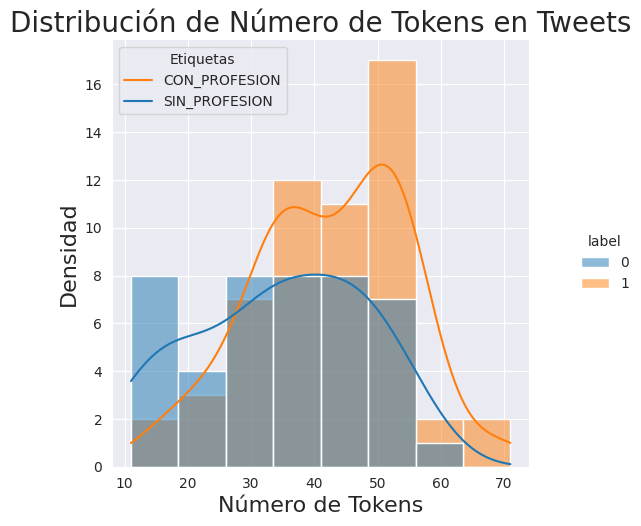

In [ ]:
# Visualización con seaborn
plt.figure(figsize=(14, 12))
sns.set_style("darkgrid")

# Crear el gráfico de densidad
sns.displot(data=dataset_train_df, x="num_tokens", hue="label", kde=True)
plt.legend(["CON_PROFESION", "SIN_PROFESION"])

# Definimos el título de los ejes:
plt.xlabel('Número de Tokens', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Título del gráfico
plt.title("Distribución de Número de Tokens en Tweets", fontsize=20)
plt.legend(title="Etiquetas", labels=["CON_PROFESION", "SIN_PROFESION"])

# Finalmente mostramos el gráfico:
plt.show()

# Análisis de la Distribución de Tokens en Tweets

## Distribución
**Descripción:** Para ambas categorías (profesionales y no profesionales), se observa una distribución unimodal, caracterizada por un único pico. El rango de tokens varía de 11 a 71, con una concentración predominante entre 25 y 55 tokens.

## Diferencias Por Categorías

### Sin Profesión
- **Estructura:** Los tweets suelen presentar una estructura uniforme.
- **Tokens:** La mayoría contiene entre 11 y 20 tokens, y entre 30 y 50 tokens.
- **Excepciones:** Un pequeño número alcanza hasta 65 tokens, sin exceder esta cantidad.

### Con Profesión
- **Tendencia:** En esta categoría, los tweets tienden a contener entre 50 y 55 tokens.
- **Variabilidad:** Se observan también tweets de 35 a 50 tokens.
- **Rangos Extremos:** Existen tweets con menos de 35 tokens y, en algunos casos, más de 65 tokens, llegando hasta 70.
- **Observaciones:** Se aprecia una mayor variabilidad en la escritura, lo que refleja diversidad en temas y estilos, así como una mayor capacidad de desarrollo.

Por lo tanto, al parecer los profesionales muestran una diversidad en la escritura y una mayor capacidad de desarrollo, mientras que los no profesionales tienden a elaborar tweets más cortos.


**Análisis de contenido de los tweets**

Para ello utiliza wordclouds

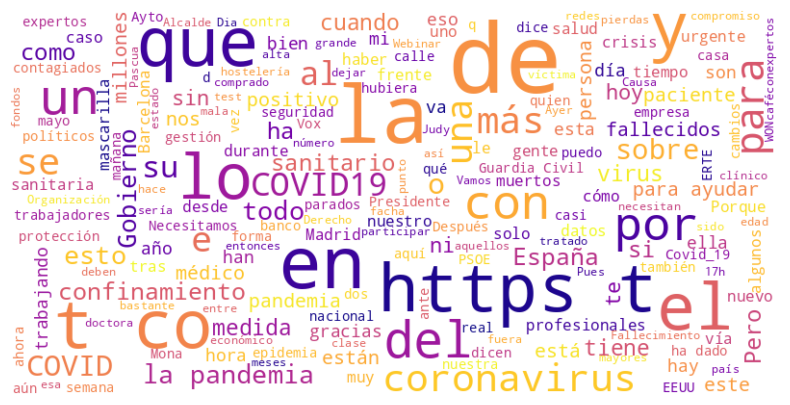

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# dataset_train_df
# dataset_val_df
# dataset_test_df

# Extraer los textos de los tweets
tweets = dataset_train_df['text'].tolist()

# Unir todos los textos en un solo string
all_text = " ".join(tweets)

# Definir stopwords adicionales si es necesario
stopwords = set(STOPWORDS)

# Generar la nube de palabras con mejoras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',  # Cambia la paleta de colores
    stopwords=stopwords,  # Eliminar palabras comunes
    min_font_size=10,
    max_font_size=100,
    random_state=42,  # Para reproducibilidad
    contour_color='steelblue',  # Color del contorno
    contour_width=1  # Ancho del contorno
).generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar ejes
plt.show()


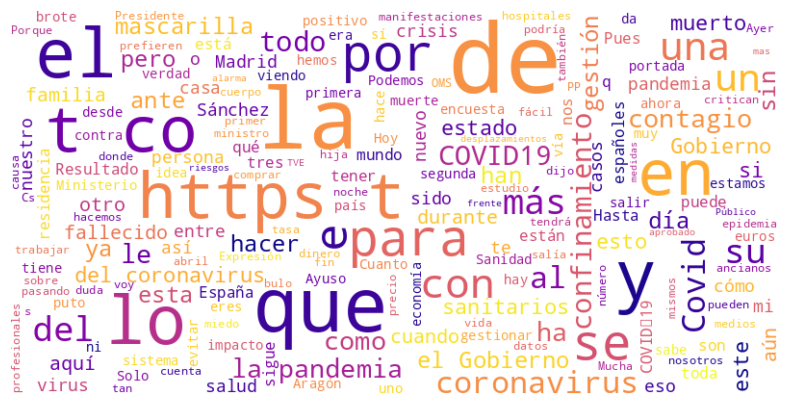

In [ ]:
# Extraer los textos de los tweets
tweets = dataset_val_df['text'].tolist()

# Unir todos los textos en un solo string
all_text = " ".join(tweets)

# Definir stopwords adicionales si es necesario
stopwords = set(STOPWORDS)

# Generar la nube de palabras con mejoras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',  # Cambia la paleta de colores
    stopwords=stopwords,  # Eliminar palabras comunes
    min_font_size=10,
    max_font_size=100,
    random_state=42,  # Para reproducibilidad
    contour_color='steelblue',  # Color del contorno
    contour_width=1  # Ancho del contorno
).generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar ejes
plt.show()


Un análisis de las dos nubes de palabras sobre la pandemia revela la prevalencia de términos directamente asociados a la emergencia sanitaria, como coronavirus, mascarilla, COVID-19 y confinamiento. No obstante, la frecuencia de conceptos de índole política (Gobierno, Vox, PSOE, Ayuso) demuestra que la conversación pública trascendió lo sanitario para adquirir una significativa dimensión socio política. El impacto humano de la crisis queda reflejado en vocablos como fallecidos, muertos y crisis. Asimismo, la presencia de topónimos como Madrid y Aragón permite inferir que el origen geográfico de los tweets analizados es España y no otro país hispanohablante.

## Tokenización

El texto del dataset no está preparado para ser introducido en un modelo Transformers. Lleva a cabo el proceso de tokenización.

In [4]:
import requests
import pandas as pd

urls = {
    'train': "https://datasets-server.huggingface.co/rows?dataset=luisgasco/profner_classification_master&config=default&split=train&offset=0&length=100",
    'val': "https://datasets-server.huggingface.co/rows?dataset=luisgasco/profner_classification_master&config=default&split=validation&offset=0&length=100",
    'test': "https://datasets-server.huggingface.co/rows?dataset=luisgasco/profner_classification_master&config=default&split=test&offset=0&length=100"
}

headers = {"User-Agent": "Mozilla/5.0"}
datasets = {}

for split, url in urls.items():
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        rows = data['rows']
        datasets[split] = pd.DataFrame([row["row"] for row in rows])
    else:
        print(f"Error al obtener {split}: {response.status_code}")
        print(response.text)

dataset_train_df = datasets.get('train')
dataset_val_df = datasets.get('val')
dataset_test_df = datasets.get('test')

##  Función de back-translation

In [7]:
from collections import Counter

label_counts = Counter(dataset_val_df["label"])
minority_class = min(label_counts, key=label_counts.get)
print(f"Clase minoritaria: {minority_class}")


Clase minoritaria: 1


In [8]:
!pip install googletrans==4.0.0-rc1

### Aumenta los datos con filas

In [21]:
from googletrans import Translator

# Inicializa el traductor
translator = Translator()

# Función de back-translation
def back_translate(text):
    try:
        # Traduce el texto al inglés (puedes cambiar 'en' por el idioma deseado)
        translated_text = translator.translate(text, dest='en').text
        # Traduce de vuelta al idioma original
        back_translated_text = translator.translate(translated_text, dest='es').text  # Cambia 'es' por el idioma original
        return back_translated_text
    except Exception as e:
        print(f"Error en traducción: {e}")
        return text  # Devuelve el texto original en caso de error

# Ejemplo de uso
original_text = "Texto a traducir"
bt_text = back_translate(original_text)
print(bt_text)


Texto para traducir


In [19]:
augmented_rows = []
seen_texts = set()

for _, row in dataset_train_df.iterrows():
    # Agregar texto original
    augmented_rows.append({"text": row["text"], "label": row["label"]})
    seen_texts.add(row["text"])

    # Back-translation
    bt_text = back_translate(row["text"])
    if bt_text != row["text"] and bt_text not in seen_texts:
        augmented_rows.append({"text": bt_text, "label": row["label"]})
        seen_texts.add(bt_text)

# Convertir a DataFrame si es necesario
augmented_df = pd.DataFrame(augmented_rows)

In [36]:
# Balanceamos al set de validacion
augmented_rows = []
bt_count = 0  # Contador para el número de retrotraducciones aplicadas
max_bt_docs = 46  # Máximo de documentos a los que se aplicará la retrotraducción para la parte de profesionales en el set de validacion

for _, row in dataset_val_df.iterrows():
    original_text = row["text"]
    row_label = row["label"]  # Cambié 'label' a 'row_label' para evitar confusión

    # Agrega el texto original
    augmented_rows.append({"text": original_text, "label": row_label})

    # Aplica la retrotraducción (back-translation) solo si la etiqueta es 1 y no se ha alcanzado el límite
    if row_label == 1 and bt_count < max_bt_docs:  # Asegúrate de usar 'row_label' en lugar de 'label'
        bt_text = back_translate(original_text)
        if bt_text != original_text:
            augmented_rows.append({"text": bt_text, "label": row_label})
            bt_count += 1  # Incrementa el contador de retrotraducciones

In [37]:
import pandas as pd
from datasets import Dataset

augmented_df = pd.DataFrame(augmented_rows).sample(frac=1).reset_index(drop=True)
augmented_df_n = pd.DataFrame(augmented_rows_n).sample(frac=1).reset_index(drop=True)
train_dataset = Dataset.from_pandas(augmented_df_n)
val_dataset = Dataset.from_pandas(augmented_df)
test_dataset = Dataset.from_pandas(dataset_test_df)


 ## Tokenización

Fue entrenado por el Departamento de Ciencias de la Computación de la Universidad de Chile con un corpus masivo y diverso de texto en español. Para un entorno informal como X es preferible probar este modelo.


In [38]:
from transformers import AutoTokenizer

model_1 = "distilbert-base-uncased"
model_2 = "dccuchile/bert-base-spanish-wwm-cased"

tokenizer = AutoTokenizer.from_pretrained(model_2)

def tokenize_batch(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

train_dataset = train_dataset.map(tokenize_batch, batched=True)
val_dataset = val_dataset.map(tokenize_batch, batched=True)
test_dataset = test_dataset.map(tokenize_batch, batched=True)


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/123 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [39]:
train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 200
})

In [40]:
val_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 123
})

In [41]:
from collections import Counter
Counter(train_dataset['label'])

Counter({0: 88, 1: 112})

In [42]:
from collections import Counter
Counter(val_dataset['label'])

Counter({0: 77, 1: 46})

In [43]:
from transformers import AutoConfig, AutoModelForSequenceClassification, TrainingArguments, Trainer
# 5. Preparar modelo
#dccuchile/bert-base-spanish-wwm-cased ... lo probamos y no nos dio buenos resultados
model_1 = "distilbert-base-uncased"
model_2 = "dccuchile/bert-base-spanish-wwm-cased"
model = AutoModelForSequenceClassification.from_pretrained(model_2, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
# 6. Función de métricas
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)

    # Calcular las diferencias entre predicciones y etiquetas
    differences = np.abs(preds - labels)

    # Calcular promedio y desviación estándar de las diferencias
    mean_diff = np.mean(differences)
    std_diff = np.std(differences)

    # Calcular Z-score
    z_score = (differences - mean_diff) / std_diff if std_diff != 0 else float('inf')

    return {
        "accuracy": accuracy_score(labels, preds),
        "precision": precision_score(labels, preds, zero_division=0),
        "recall": recall_score(labels, preds, zero_division=0),
        "f1": f1_score(labels, preds, zero_division=0),
        "z_score": np.mean(z_score)
    }



In [45]:
# 7. Definir argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,
    learning_rate=1.599023984803007e-05,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    warmup_steps=5,
    logging_dir="./logs",
    logging_steps=10,
)

In [46]:
import os

# Establece la API key de wandb como variable de entorno
os.environ["WANDB_API_KEY"] = "146f7c3e4b6c465ef2304788cae36898ec424f64"

In [47]:
# 8. Trainer y entrenamiento
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

trainer.train()

<ipython-input-47-1689471739>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: dayayagu (dayayagu-ucm) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,0.693300
20,0.648200
30,0.592400
40,0.561900
50,0.548500
60,0.448500
70,0.380900


TrainOutput(global_step=75, training_loss=0.5434691905975342, metrics={'train_runtime': 25.3231, 'train_samples_per_second': 23.694, 'train_steps_per_second': 2.962, 'total_flos': 39466658304000.0, 'train_loss': 0.5434691905975342, 'epoch': 3.0})

In [48]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.7844725251197815, 'eval_accuracy': 0.4634146341463415, 'eval_precision': 0.38636363636363635, 'eval_recall': 0.7391304347826086, 'eval_f1': 0.5074626865671642, 'eval_z_score': -5.415722071342227e-18, 'eval_runtime': 0.8831, 'eval_samples_per_second': 139.276, 'eval_steps_per_second': 18.117, 'epoch': 3.0}


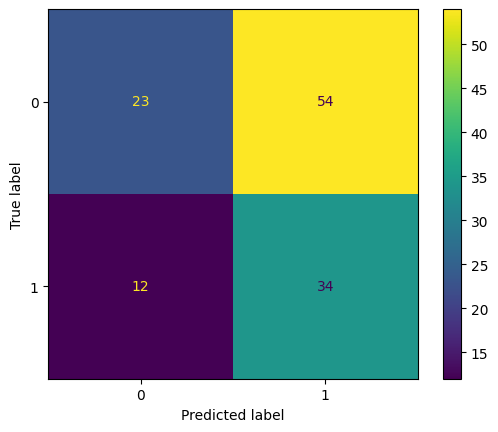

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

preds_output = trainer.predict(val_dataset)
y_true = preds_output.label_ids
y_pred = preds_output.predictions.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [23]:
# 9. Evaluar en el set de validacion
print("Resultados en test:")
results = trainer.evaluate(test_dataset)
print(results)

Resultados en test:


IndexError: Target -1 is out of bounds.

Selecciona un modelo apropiado para la tarea:

In [18]:
#dccuchile/bert-base-spanish-wwm-cased ... lo probamos y no nos dio buenos resultados
model = "distilbert-base-uncased"

Se eligió el modelo BETO por su profundo entrenamiento en español, lo que le permite entender las particularidades del idioma. Su técnica "Whole Word Masking" es ideal para el texto informal de los tweets en la plataforma social X, y al ser sensible a mayúsculas, distingue mejor nombres y acrónimos. Además, se lo ha puesto ha prueba y ha demostrado un alto rendimiento en tareas de clasificación en español, siendo la base más robusta para este tipo de proyectos. En conjunto, es la opción óptima para analizar tuits sobre la pandemia en España.

> Recuerda que en la siguiente celda sólo debes asignar un valor a model_name. No añadas más información en la celda.

Puedes continuar con el proceso aquí:

## Fine-tuning

Training Loss: Muestra el valor de la función de pérdida (loss) durante el entrenamiento.
Ejemplo: en el paso 10 la pérdida era 0.72, en el 20 bajó a 0.58, y el promedio final es 0.65.
TrainOutput:
global_step=21 → Hiciste 21 pasos de entrenamiento (batches).
training_loss=0.65 → Pérdida promedio final. Un valor menor indica mejor ajuste; menos de 0.7 es razonable para un primer entrenamiento binario.
Otros valores indican velocidad y recursos consumidos.

Carga el model para ser ajustado posteriormente:

In [19]:
from transformers import AutoConfig, AutoModelForSequenceClassification, TrainingArguments, Trainer
# EVITAR SOBREAJUSTE: usar tecnica dropout

config = AutoConfig.from_pretrained(
    model,
    hidden_dropout_prob=0.3,
    attention_probs_dropout_prob=0.3,
    num_labels=2
)

model = AutoModelForSequenceClassification.from_pretrained(
    model,
    config=config
)


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


from transformers import AutoConfig, AutoModelForSequenceClassification, TrainingArguments, Trainer
config = AutoConfig.from_pretrained(
    "PlanTL-GOB-ES/roberta-base-bne",
    hidden_dropout_prob=0.3,
    attention_probs_dropout_prob=0.3,
    num_labels=2
)

model = AutoModelForSequenceClassification.from_pretrained(
    "PlanTL-GOB-ES/roberta-base-bne",
    config=config
)

## LIMPIEZA DE DATOS

In [ ]:
"""
import re

def clean_text(text):
    text = text.lower()  # minúsculas
    text = re.sub(r"http\S+", "", text)  # quita URLs
    text = re.sub(r"@\w+", "", text)  # quita menciones
    text = re.sub(r"#\w+", "", text)  # quita hashtags
    text = re.sub(r"\d+", "", text)   # quita números
    # text = re.sub(r"[^\w\s]", "", text)  # quita signos de puntuación
    text = text.strip()
    return text

# Aplica a tus dataframes
for df in [dataset_train_df, dataset_val_df, dataset_test_df]:
    df["text"] = df["text"].apply(clean_text)

In [ ]:
""" for df in [dataset_train_df, dataset_val_df, dataset_test_df]:
    df["text"] = df["text"].apply(clean_text)

## AJUSTE DE HIPERPARÁMETROS

Evaluar con Optuna cuales podrian ser mis mejores hiperparametros

In [ ]:
import os

# Establece la API key de wandb como variable de entorno
os.environ["WANDB_API_KEY"] = "146f7c3e4b6c465ef2304788cae36898ec424f64"

In [17]:
""" import optuna
from transformers import Trainer
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=1.599023984803007e-05,
    weight_decay=0.1,
    warmup_steps=5,
    logging_dir='./logs',
    logging_steps=10,
)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    # Z-score de las probabilidades de la clase positiva:
    # pred.predictions.shape = (n_samples, n_classes)
    # Tomamos la columna de la clase 1
    probs_positive = pred.predictions[:, 1] if pred.predictions.shape[1] > 1 else pred.predictions[:, 0]
    # Calcula los z-scores de las probabilidades de la clase positiva
    zscores = zscore(probs_positive)
    avg_zscore = np.mean(zscores)

    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'avg_zscore_positive_probs': avg_zscore
    }
def model_init():
    # Devuelve una nueva instancia de tu modelo para cada prueba
    return AutoModelForSequenceClassification.from_pretrained(
        "dccuchile/bert-base-spanish-wwm-cased",
        num_labels=2
    )

def hp_space(trial):
    return {
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 3, 8),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32]),
        "weight_decay": trial.suggest_loguniform("weight_decay", 1e-4, 0.1),
        "warmup_steps": trial.suggest_int("warmup_steps", 0, 500)
    }

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

study = trainer.hyperparameter_search(
    direction="maximize",
    hp_space=hp_space,
    n_trials=10
)

print("Mejores hiperparámetros encontrados:", study)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2025-06-11 15:03:33,180] A new study created in memory with name: no-name-e579803e-9b5e-45c8-8ed5-6a0deb9006c9
<ipython-input-17-2857080512>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
<ipython-input-17-2857080512>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugge

Step,Training Loss
10,0.707700
20,0.686800


[I 2025-06-11 15:12:14,563] Trial 0 finished with value: 1.5465891370424212 and parameters: {'learning_rate': 3.0239604321085713e-05, 'num_train_epochs': 5, 'per_device_train_batch_size': 32, 'weight_decay': 0.017198792516265687, 'warmup_steps': 420}. Best is trial 0 with value: 1.5465891370424212.
<ipython-input-17-2857080512>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
<ipython-input-17-2857080512>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "weight_decay": trial.suggest_loguniform("weight_decay", 1e-4, 0.1),
Some weights of BertForSequenceClassification were not initialized from the m

eval/accuracy,▁
eval/f1,▁
eval/loss,▁
eval/precision,▁
eval/recall,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁███
train/global_step,▁███
train/grad_norm,▁█


Step,Training Loss
10,0.708700
20,0.720700
30,0.702400
40,0.674000


[I 2025-06-11 15:22:26,182] Trial 1 finished with value: 1.6149143610013172 and parameters: {'learning_rate': 1.4784703438631737e-05, 'num_train_epochs': 6, 'per_device_train_batch_size': 16, 'weight_decay': 0.06841421980227785, 'warmup_steps': 491}. Best is trial 1 with value: 1.6149143610013172.
<ipython-input-17-2857080512>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
<ipython-input-17-2857080512>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "weight_decay": trial.suggest_loguniform("weight_decay", 1e-4, 0.1),
Some weights of BertForSequenceClassification were not initialized from the mo

eval/accuracy,▁
eval/f1,▁
eval/loss,▁
eval/precision,▁
eval/recall,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▃▅███
train/global_step,▁▃▅███
train/grad_norm,▄▁▅█


Step,Training Loss
10,0.707300


[I 2025-06-11 15:28:42,540] Trial 2 finished with value: 1.3858435454087628 and parameters: {'learning_rate': 2.9589326027921224e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 32, 'weight_decay': 0.0003445683974181179, 'warmup_steps': 345}. Best is trial 1 with value: 1.6149143610013172.
<ipython-input-17-2857080512>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
<ipython-input-17-2857080512>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "weight_decay": trial.suggest_loguniform("weight_decay", 1e-4, 0.1),
Some weights of BertForSequenceClassification were not initialized from the 

eval/accuracy,▁
eval/f1,▁
eval/loss,▁
eval/precision,▁
eval/recall,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁██
train/global_step,▁██
train/grad_norm,▁


Step,Training Loss
10,0.711100
20,0.658600
30,0.654900
40,0.590500
50,0.487200
60,0.311200
70,0.187300


[I 2025-06-11 15:39:39,820] Trial 3 finished with value: 2.012490561441968 and parameters: {'learning_rate': 3.1717407396477876e-05, 'num_train_epochs': 6, 'per_device_train_batch_size': 8, 'weight_decay': 0.0016795399106685352, 'warmup_steps': 90}. Best is trial 3 with value: 2.012490561441968.
<ipython-input-17-2857080512>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
<ipython-input-17-2857080512>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "weight_decay": trial.suggest_loguniform("weight_decay", 1e-4, 0.1),
Some weights of BertForSequenceClassification were not initialized from the mode

eval/accuracy,▁
eval/f1,▁
eval/loss,▁
eval/precision,▁
eval/recall,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁▂▃▄▅▆▇██
train/global_step,▁▂▃▄▅▆▇██
train/grad_norm,▁▁▅█▃▃▁


Step,Training Loss


Step,Training Loss
10,0.705100
20,0.670600


[I 2025-06-11 15:48:12,589] Trial 4 finished with value: 1.8845962905980835 and parameters: {'learning_rate': 3.707776572534731e-05, 'num_train_epochs': 5, 'per_device_train_batch_size': 32, 'weight_decay': 0.05209034512719797, 'warmup_steps': 236}. Best is trial 3 with value: 2.012490561441968.
<ipython-input-17-2857080512>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
<ipython-input-17-2857080512>:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "weight_decay": trial.suggest_loguniform("weight_decay", 1e-4, 0.1),
Some weights of BertForSequenceClassification were not initialized from the mode

eval/accuracy,▁
eval/f1,▁
eval/loss,▁
eval/precision,▁
eval/recall,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁███
train/global_step,▁███
train/grad_norm,▁█


Step,Training Loss
10,0.708200
20,0.712300
30,0.681300
40,0.656400


[W 2025-06-11 15:58:31,846] Trial 5 failed with parameters: {'learning_rate': 3.397802332504751e-05, 'num_train_epochs': 8, 'per_device_train_batch_size': 16, 'weight_decay': 0.004827365044903823, 'warmup_steps': 500} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/integrations/integration_utils.py", line 255, in _objective
    trainer.train(resume_from_checkpoint=checkpoint, trial=trial)
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 2240, in train
    return inner_training_loop(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 2606, in _inner_training_loop
    self.optimizer.step()
  File "/usr/local/lib/python3.11/dist-package

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-2857080512>", line 28, in <cell line: 0>
    study = trainer.hyperparameter_search(
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 3632, in hyperparameter_search
    best_run = backend_obj.run(self, n_trials, direction, **kwargs)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/hyperparameter_search.py", line 72, in run
    return run_hp_search_optuna(trainer, n_trials, direction, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/integrations/integration_utils.py", line 273, in run_hp_search_optuna
    study.optimize(_objecti

TypeError: object of type 'NoneType' has no len()

### Configuracion training_args

Configura los parámetros de entrenamiento del modelo.


>

> Recuerda que en la siguiente celda sólo debes asignar atributos a la variable training_args. No añadas  otras variables en la celda

In [ ]:
#NO-MODIFY: VARIABLE NAME
from transformers import TrainingArguments, Trainer
# con los mejores hiperparametros se ajusta el modelo: Mejores hiperparámetros encontrados: BestRun(run_id='8', objective=2.00811580900029,
#hyperparameters={'learning_rate': 1.599023984803007e-05, 'num_train_epochs': 3, 'per_device_train_batch_size': 8, 'weight_decay': 0.005897593656456644, 'warmup_steps': 5}, run_summary=None)


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=1.599023984803007e-05,
    weight_decay=0.1,
    warmup_steps=5,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)
trainer.train()


Step,Training Loss
10,0.703700
20,0.698200
30,0.686500


TrainOutput(global_step=39, training_loss=0.6955537918286446, metrics={'train_runtime': 38.5088, 'train_samples_per_second': 7.79, 'train_steps_per_second': 1.013, 'total_flos': 19733329152000.0, 'train_loss': 0.6955537918286446, 'epoch': 3.0})

### Métricas de evaluación

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from scipy.stats import zscore
import numpy as np

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    # Z-score de las probabilidades de la clase positiva:
    # pred.predictions.shape = (n_samples, n_classes)
    # Tomamos la columna de la clase 1
    probs_positive = pred.predictions[:, 1] if pred.predictions.shape[1] > 1 else pred.predictions[:, 0]
    # Calcula los z-scores de las probabilidades de la clase positiva
    zscores = zscore(probs_positive)
    avg_zscore = np.mean(zscores)

    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'avg_zscore_positive_probs': avg_zscore
    }

# Re-crea el trainer con compute_metrics actualizado si es necesario
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

eval_metrics = trainer.evaluate(eval_dataset=val_dataset)
print("Métricas completas en validación:", eval_metrics)

Métricas completas en validación: {'eval_loss': 0.6827720403671265, 'eval_model_preparation_time': 0.0035, 'eval_accuracy': 0.77, 'eval_precision': 0.0, 'eval_recall': 0.0, 'eval_f1': 0.0, 'eval_avg_zscore_positive_probs': -1.3947486365850637e-07, 'eval_runtime': 0.7342, 'eval_samples_per_second': 136.202, 'eval_steps_per_second': 17.706}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from scipy.special import softmax
import numpy as np

# Haz la predicción sobre el conjunto de validación
outputs = trainer.predict(val_dataset)
logits = outputs.predictions  # (num_samples, num_clases)
probs = softmax(logits, axis=1)[:, 1]  # Probabilidad de la clase positiva
labels = outputs.label_ids

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

threshold = 0.50
preds = (probs >= threshold).astype(int)

print("Accuracy:", accuracy_score(labels, preds))
print("Precision:", precision_score(labels, preds))
print("Recall:", recall_score(labels, preds))
print("F1:", f1_score(labels, preds))

Accuracy: 0.27
Precision: 0.23404255319148937
Recall: 0.9565217391304348
F1: 0.37606837606837606


Mejor threshold según F1: 0.50
Accuracy: 0.270, Precision: 0.234, Recall: 0.957, F1: 0.376


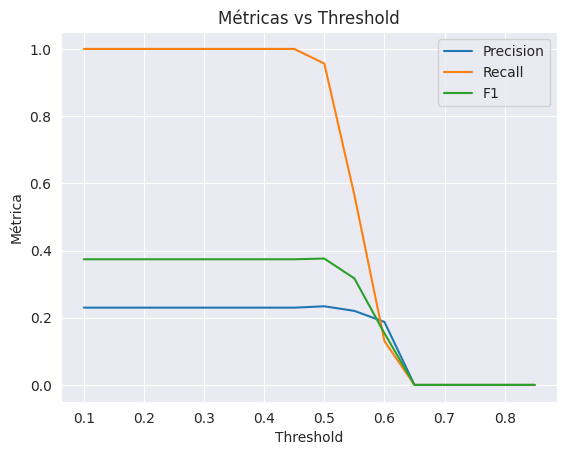

In [ ]:
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Suponiendo que ya tienes outputs de trainer.predict(val_dataset)
# outputs = trainer.predict(val_dataset)
logits = outputs.predictions
labels = outputs.label_ids

# Calcula probabilidad de clase positiva
probs = softmax(logits, axis=1)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.05)
metrics = {'threshold': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for t in thresholds:
    preds = (probs >= t).astype(int)
    metrics['threshold'].append(t)
    metrics['accuracy'].append(accuracy_score(labels, preds))
    metrics['precision'].append(precision_score(labels, preds, zero_division=0))
    metrics['recall'].append(recall_score(labels, preds, zero_division=0))
    metrics['f1'].append(f1_score(labels, preds, zero_division=0))

# Encuentra el mejor threshold según F1
best_idx = np.argmax(metrics['f1'])
best_threshold = metrics['threshold'][best_idx]
print(f"Mejor threshold según F1: {best_threshold:.2f}")
print(f"Accuracy: {metrics['accuracy'][best_idx]:.3f}, Precision: {metrics['precision'][best_idx]:.3f}, Recall: {metrics['recall'][best_idx]:.3f}, F1: {metrics['f1'][best_idx]:.3f}")

# Grafica las métricas
plt.plot(metrics['threshold'], metrics['precision'], label="Precision")
plt.plot(metrics['threshold'], metrics['recall'], label="Recall")
plt.plot(metrics['threshold'], metrics['f1'], label="F1")
plt.xlabel("Threshold")
plt.ylabel("Métrica")
plt.legend()
plt.title("Métricas vs Threshold")
plt.show()

Análisis del gráfico
Recall (naranja) es muy alto (≈1) para umbrales bajos (<0.5), pero cae bruscamente al aumentar el umbral.
Precision (azul) es baja en todos los umbrales y sube ligeramente, pero nunca supera ~0.4.
F1 (verde) es bajo y plano, con un pequeño pico cerca de 0.5–0.6, pero tampoco supera 0.45.
Esto significa que:

El modelo predice la mayoría de los positivos correctamente cuando el umbral es bajo (recall alto), pero también comete muchos falsos positivos (precision baja).
Al subir el umbral, recall baja drásticamente, pero precision apenas mejora.

In [ ]:
outputs_val = trainer.predict(val_dataset)
logits_val = outputs_val.predictions
labels_val = outputs_val.label_ids

from scipy.special import softmax
probs_val = softmax(logits_val, axis=1)[:, 1]
threshold = 0.5
preds_val = (probs_val >= threshold).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Validación:")
print("Accuracy:", accuracy_score(labels_val, preds_val))
print("Precision:", precision_score(labels_val, preds_val))
print("Recall:", recall_score(labels_val, preds_val))
print("F1:", f1_score(labels_val, preds_val))

Validación:
Accuracy: 0.27
Precision: 0.23404255319148937
Recall: 0.9565217391304348
F1: 0.37606837606837606


Define las métricas de evaluación

## aqui el resumen de las conclusiones:

### Ajuste del modelo

Lleva a cabo el ajuste del modelo:

## Evaluacion

Una vez llevada a cabo el entrenamiento, realiza la evaluación del modelo.

## Genera predicciones

Genera predicciones sobre el test set. Recuerda que el archivo que generes y adjuntes al ejercicio debe tener dos columnas:


| id         | label |
|------------|-------|
| 1234567890 | 1     |
| 1234567891 | 0     |
| 1234567892 | 0     |
| 1234567893 | 1     |

- El archivo debe estar en formato **TSV** (separado por tabuladores).
- Debe contener exactamente **dos columnas**: `id` y `label`.
- Es obligatorio incluir la **cabecera**.
